### Data vocabulary:

##### 1. #3 (age): age in years 
##### 2. #4 (sex): sex (1 = male; 0 = female) 
##### 3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
##### 4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
##### 5. #12 (chol): serum cholestoral in mg/dl 
##### 6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
##### 7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
##### 8. #32 (thalach): maximum heart rate achieved 
##### 9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
##### 10. #40 (oldpeak): ST depression induced by exercise relative to rest 
##### 11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
##### 12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
##### 13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
##### 14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

## Libraries

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PolynomialFeatures
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score,confusion_matrix,classification_report, \
plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve,roc_curve,roc_auc_score

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("max_columns",100)
pd.set_option("max_rows",900)
pd.set_option("max_colwidth",200)

## Ingest the data to notebook

In [207]:
df=pd.read_csv("heart.csv")
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [209]:
def color(val):
    if val > 0.85 and val < 0.99:
        color = 'darkgreen'
    elif val==1:
        color="green"
    elif abs(val) < 0.10:
        color="red"
    else:
        color = 'white'
    return f'color: {color}'
pd.DataFrame(df).corr().style.applymap(color)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

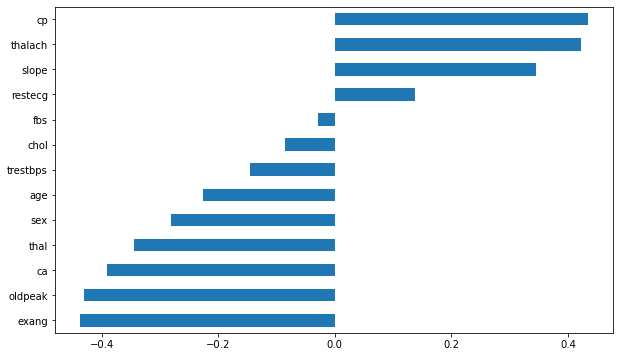

In [210]:
df.corr()["target"].drop("target").sort_values().plot.barh()

### EDA

### Data Preprocessing

In [211]:
X=df.drop(columns="target")
y=df["target"]

In [212]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [213]:
scaler = MinMaxScaler()

In [214]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### Implement Logistic Regression and Evaluate

In [215]:
log_mod = LogisticRegression()
log_mod.fit(X_train_scale,y_train)
y_pred_scale = log_mod.predict(X_test_scale)
y_pred_proba = log_mod.predict_proba(X_test_scale)

[[29  6]
 [ 5 36]]


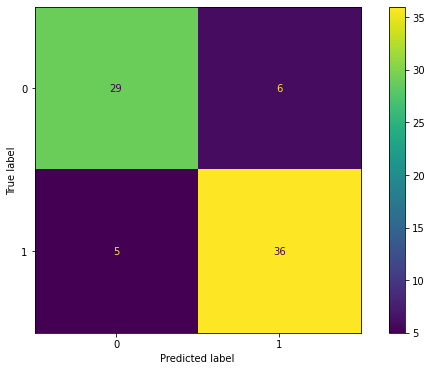

In [216]:
print(confusion_matrix(y_test,y_pred_scale))
plot_confusion_matrix(log_mod,X_test_scale,y_test);

In [217]:
print(classification_report(y_test,y_pred_scale))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



In [218]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scale, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
pd.DataFrame(scores).mean()

fit_time                   0.003999
score_time                 0.002904
test_accuracy              0.811067
test_precision_weighted    0.816712
test_recall_weighted       0.811067
test_f1_weighted           0.808591
dtype: float64

In [219]:
help(LogisticRegressionCV())

Help on LogisticRegressionCV in module sklearn.linear_model._logistic object:

class LogisticRegressionCV(LogisticRegression, sklearn.linear_model._base.LinearClassifierMixin, sklearn.base.BaseEstimator)
 |  LogisticRegressionCV(*, Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, verbose=0, refit=True, intercept_scaling=1.0, multi_class='auto', random_state=None, l1_ratios=None)
 |  
 |  Logistic Regression CV (aka logit, MaxEnt) classifier.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  This class implements logistic regression using liblinear, newton-cg, sag
 |  of lbfgs optimizer. The newton-cg, sag and lbfgs solvers support only L2
 |  regularization with primal formulation. The liblinear solver supports both
 |  L1 and L2 regularization, with a dual formulation only for the L2 penalty.
 |  Elastic-Net penalty is only supported by the saga solver.
 |  


In [220]:
log_modelCV = LogisticRegression(multi_class="ovr",max_iter=5000)

In [221]:
penalty = ["l1", "l2","none"]
l1_ratio = np.linspace(0, 1, 20) #linspace liner alıyor
C = np.logspace(0, 10, 20) #logaritmik alıyor #C değerlerinin logaritmik aralıktan seçilmesi tavsiye edilir.

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [222]:
grid_model = GridSearchCV(log_modelCV, param_grid = param_grid)

In [223]:
grid_model

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'none']})

In [224]:
grid_model.fit(X_train_scale,y_train)

C:\Users\SFS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SFS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SFS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\SFS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\SFS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'none']})

In [225]:
grid_model.best_params_

{'C': 3.3598182862837818, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [226]:
params ={'C': 3.3598182862837818, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [227]:
grid_model_cv = LogisticRegression(penalty="l2",C=3.3598182862837818, max_iter=5000,
                   multi_class='ovr',) 

In [228]:
grid_model_cv.fit(X_train_scale,y_train)

LogisticRegression(C=3.3598182862837818, max_iter=5000, multi_class='ovr')

In [229]:
y_pred = grid_model_cv.predict(X_test_scale)

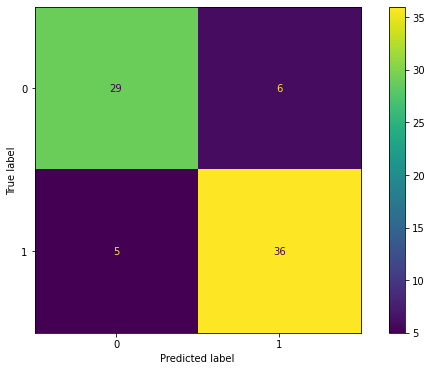

In [230]:
plot_confusion_matrix(grid_model_cv, X_test_scale, y_test)

In [231]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29  6]
 [ 5 36]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



In [232]:
roc_auc_score(y_test,y_pred_proba[:,1])

0.910801393728223

In [233]:
fp,tp,treshold =  roc_curve(y_test,y_pred_proba[:,1])

In [234]:
optimum_treshold = treshold[np.argmax(tp-fp)]
optimum_treshold

0.4708589685663754

In [235]:
y_pred_opt = [1 if i > optimum_treshold else 0 for i in y_pred_proba[:,1]]

In [236]:
print(classification_report(y_test,y_pred_opt))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



### Visually compare models based on your chosen metric

### Chose best model and make a random prediction

In [237]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [238]:
scaler = StandardScaler()
knn =KNeighborsClassifier()

In [239]:
steps = [('scaler', scaler), ('knn', knn)]

In [240]:
pipe =Pipeline(steps=steps)

In [241]:
k_values= list(range(1,18))

In [242]:
param_grid={"knn__n_neighbors":k_values}

In [243]:
full_cv_class = GridSearchCV(pipe,param_grid=param_grid,scoring="accuracy",cv=10)

In [244]:
full_cv_class.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17]},
             scoring='accuracy')

In [245]:
full_cv_class.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=17))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=17),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 17,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [355]:
def k_neighbors(k):
    test_error_rates = []
    for k in range(1,k):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train,y_train) 

        y_pred_test = knn_model.predict(X_test_scale)

        test_error = 1 - accuracy_score(y_test,y_pred_test)
        test_error_rates.append(test_error)
    return test_error_rates.index(min(test_error_rates))

In [356]:
k_neighbors(15)

4

In [342]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scale,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scale)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

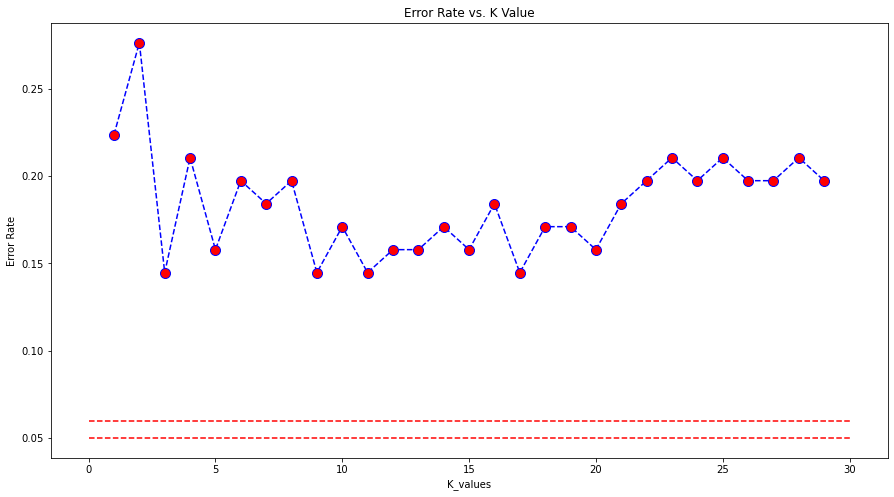

In [343]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.05, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.06, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [326]:
scaler: StandardScaler()
knn: KNeighborsClassifier(n_neighbors=17)

In [327]:
steps = [('scaler', scaler), ('knn', knn)]
pipe = Pipeline(steps=steps)

In [328]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [329]:
y_pred_pipe = pipe.predict(X_test)

In [330]:
print(classification_report(y_test,y_pred_pipe))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.90      0.88      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



### Implement SVM and Evaluate

In [251]:
from sklearn.svm import SVC,SVR

from sklearn.metrics import classification_report,confusion_matrix

In [252]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [253]:
from sklearn.model_selection import GridSearchCV

In [254]:
param_grid1 = {'svc__C': [0.01,0.1,0.2,0.5,1.0,2],
               'svc__degree': [1,2,3],
               'svc__gamma': ['scale',"auto"],
               'svc__kernel': ['rbf',"linear"]}

In [255]:
gridCV_pipe = GridSearchCV(pipe1,param_grid=param_grid1,scoring="f1",n_jobs=-1,cv=10)

In [256]:
gridCV_pipe.fit(X_train,y_train) # 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 0.2, 0.5, 1.0, 2],
                         'svc__degree': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['rbf', 'linear']},
             scoring='f1')

In [257]:
gridCV_pipe.best_params_

{'svc__C': 0.2, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

In [258]:
y_pipeCV = gridCV_pipe.predict(X_test)

In [259]:
print(confusion_matrix(y_test,y_pipeCV))
print(classification_report(y_test,y_pipeCV)) # SVC değeri daha güzel

[[30  5]
 [ 3 38]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



In [260]:
print(confusion_matrix(y_test,y_pred_pipe))
print(classification_report(y_test,y_pred_pipe))  #KNN e göre değerler

[[31  4]
 [ 5 36]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.90      0.88      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

